# Steps in the Koala Detection Below
1. Install YOLOv8
2. Mount the custom dataset
3. Coutom Training
4. Validate Custom Model
5. Interference with Custom model
6. Export Model

In [1]:
!nvidia-smi

Sat Nov 18 12:07:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

There are two way to install YOLOv8
1. From the sourcec
2. Via pip (Using)

In [3]:
!pip install ultralytics==8.0.28
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
# Git clone method
# %cd {HOME}
# git clone (github link)
# %cd {HOME}/ultralytics
# !pip install -e

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

# Custom dataset

In [5]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
import shutil
custom_data_path = "/content/drive/MyDrive/Koala Detection/Koala Detection.v1i.yolov8.zip"
destination_path = f"/content/Koala_Detection.v1i.yolov8.zip"
shutil.copy(custom_data_path, destination_path)

'/content/Koala_Detection.v1i.yolov8.zip'

In [8]:
!unzip "Koala_Detection.v1i.yolov8.zip" -d "datasets"

Archive:  Koala_Detection.v1i.yolov8.zip
 extracting: datasets/README.dataset.txt  
 extracting: datasets/README.roboflow.txt  
 extracting: datasets/data.yaml      
   creating: datasets/test/
   creating: datasets/test/images/
 extracting: datasets/test/images/image-4-_jpeg.rf.7aa06f157edd4518006367ece5a324b4.jpg  
 extracting: datasets/test/images/image-5-_jpeg.rf.cc6391e6fa75d00431488a2b1a513150.jpg  
 extracting: datasets/test/images/images-10-_jpeg.rf.95b56a67258067559e31cc20d4e1ae51.jpg  
 extracting: datasets/test/images/images-116-_jpeg.rf.bddf4c6c497db529f6d68f024f60a848.jpg  
 extracting: datasets/test/images/images-119-_jpeg.rf.24e2fe5d6098707d3d417da6c1b57f6a.jpg  
 extracting: datasets/test/images/images-123-_jpeg.rf.971e9dfcbe10f01bfa2dc196bd5d18a5.jpg  
 extracting: datasets/test/images/images-141-_jpeg.rf.bec1c3e49906f86eddc65003746bcb0e.jpg  
 extracting: datasets/test/images/images-143-_jpeg.rf.021ce3f5037d367ac09f1154855d7ea6.jpg  
 extracting: datasets/test/images/

# Custom Training

In [9]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8l.pt data='{DATA_DIR}/data.yaml' epochs=50 imgsz=640

/content
100% 83.7M/83.7M [00:00<00:00, 311MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

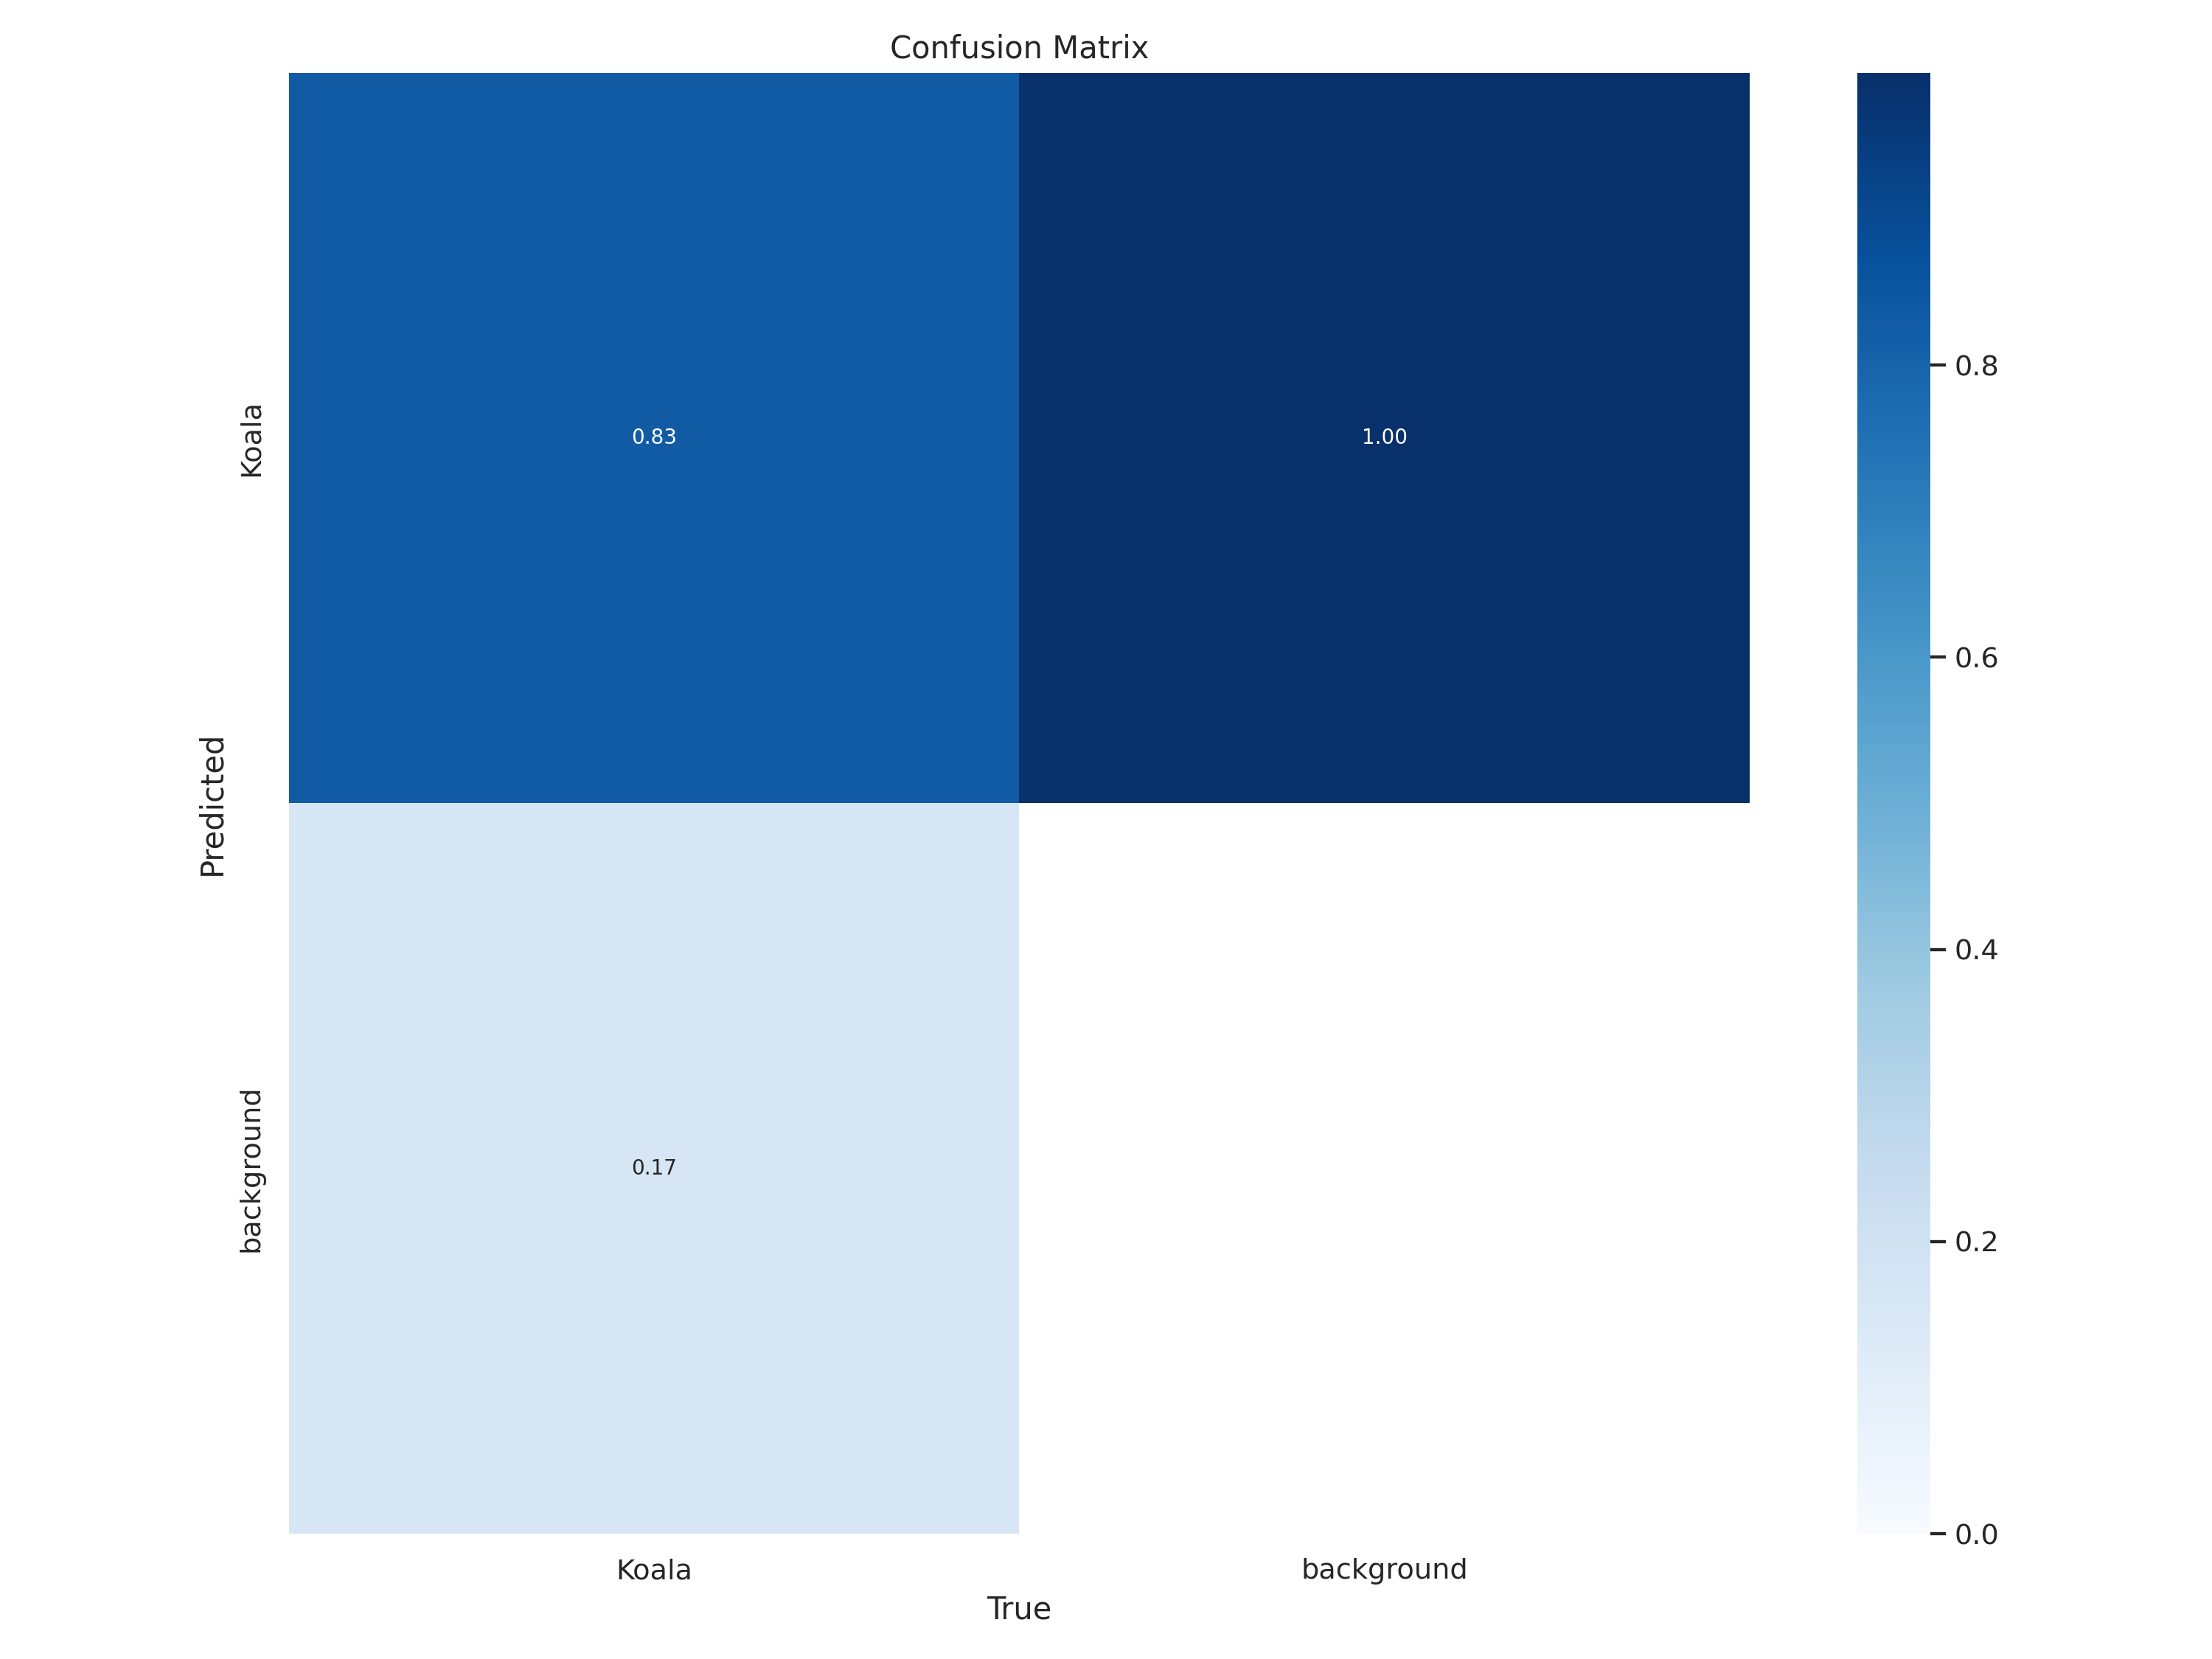

In [12]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png')

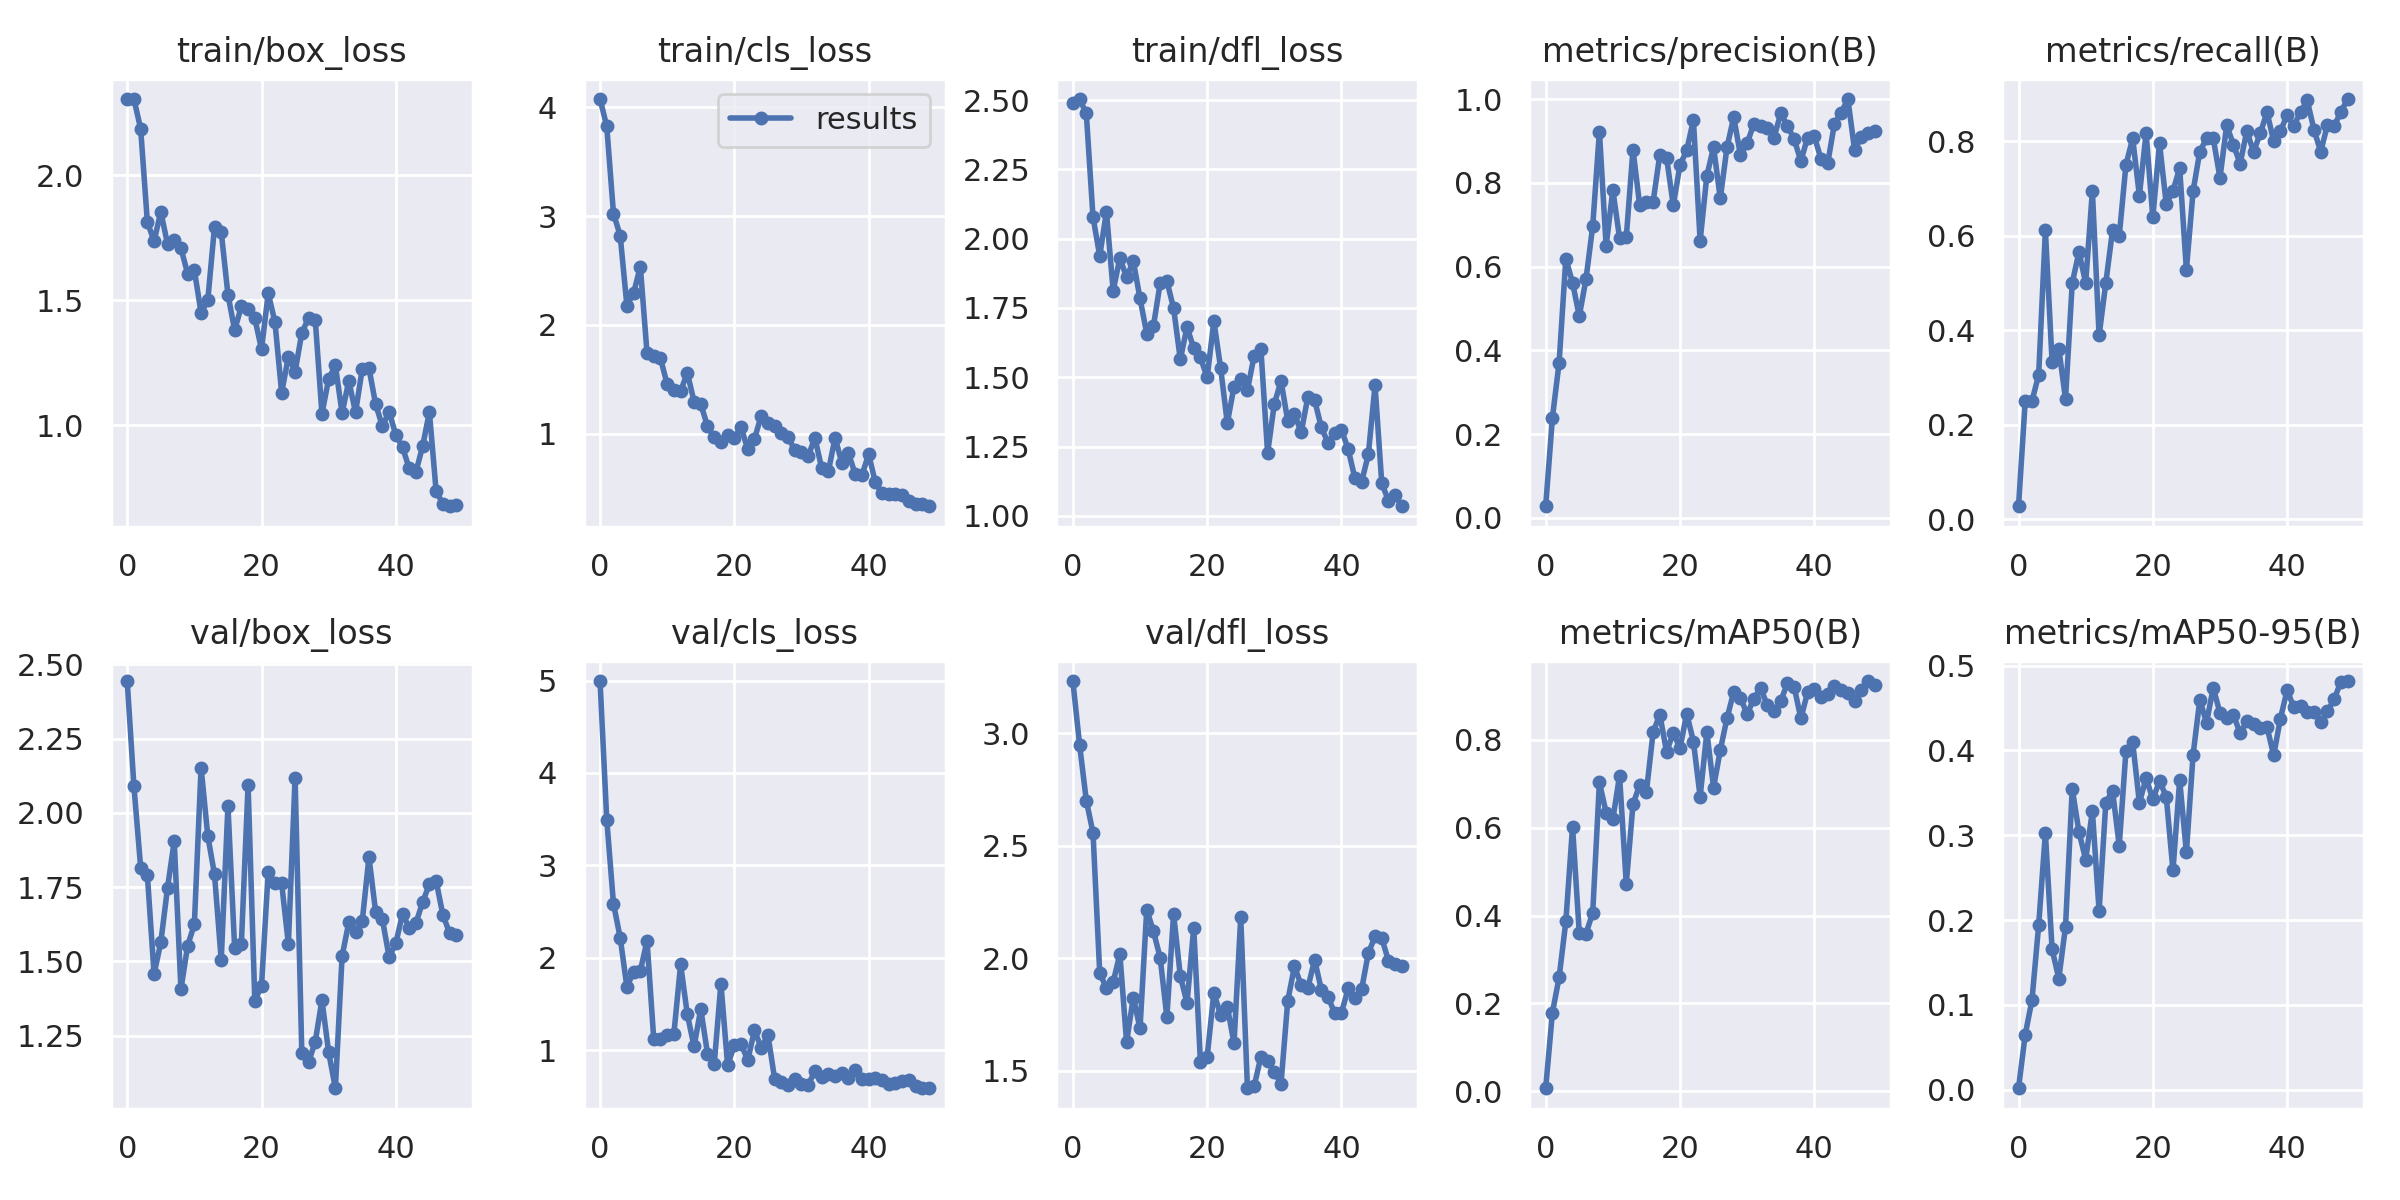

In [13]:
Image(filename=f"{HOME}/runs/detect/train/results.png")

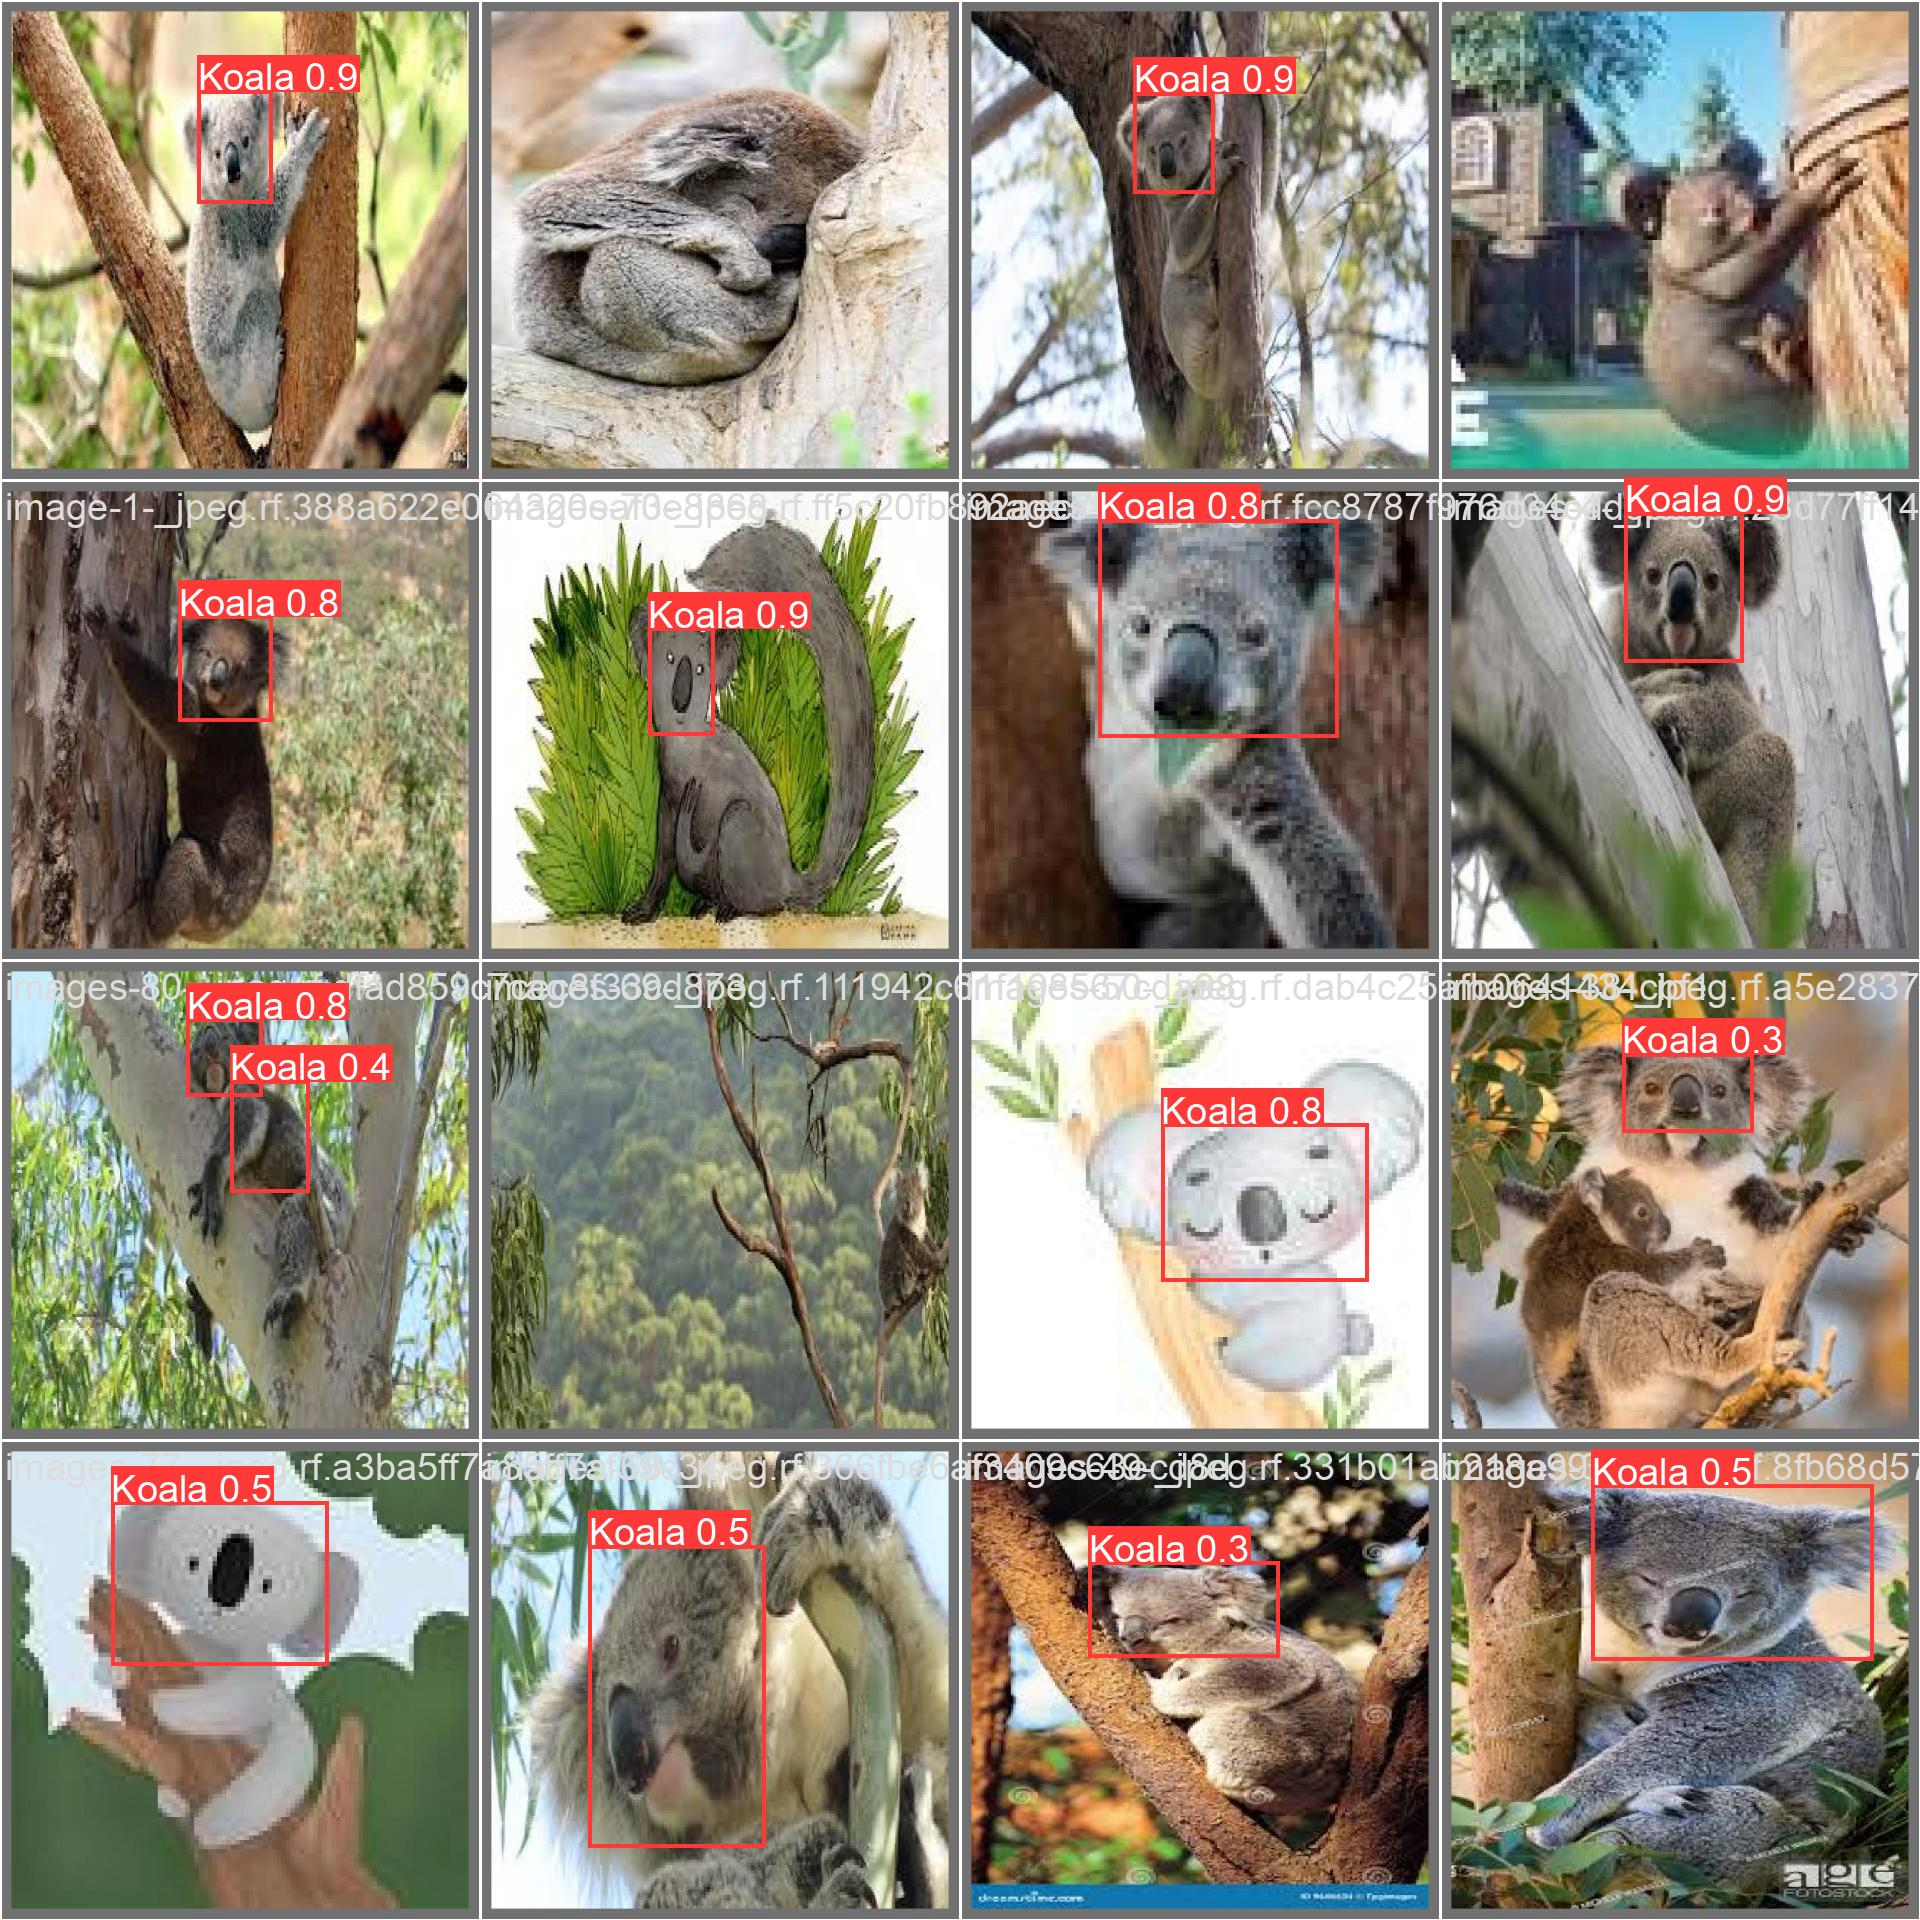

In [14]:
Image(filename=f"{HOME}/runs/detect/train/val_batch0_pred.jpg")

# Validate Custom Model

In [16]:
!yolo task=detect mode=val model="{HOME}/runs/detect/train/weights/best.pt" data="{DATA_DIR}/data.yaml"

2023-11-18 13:06:52.519570: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 13:06:52.519639: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 13:06:52.519690: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 13:06:54.037975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 33 images, 0 ba

# Interference with Custom Model

In [17]:
!yolo task=detect mode=predict model="{HOME}/runs/detect/train/weights/best.pt" conf=0.5 source="{DATA_DIR}/test/images" save=true

2023-11-18 13:09:20.235030: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 13:09:20.235091: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 13:09:20.235132: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 13:09:21.656523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/16 /content/datasets/test/images/image-4-_jpeg.rf.7aa06f157e

# Export Model

In [20]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=onnx

2023-11-18 13:15:44.125317: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 13:15:44.125383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 13:15:44.125424: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 13:15:45.156887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/best.pt with input shape (1, 3, 64